Bagging & Boosting KNN & Stacking

In [ ]:
'''
Question 1 : What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?
Answer:      Ensemble techniques combine multiple weak models to form a stronger predictive model. The idea is that a group of diverse learners
             performs better than a single one.
             
             Bagging (Bootstrap Aggregating) trains models in parallel on random subsets to reduce variance and prevent overfitting.
           
             Boosting trains models sequentially, where each new model corrects previous errors, reducing bias and improving accuracy.
           
           → Bagging = parallel, reduces variance.
           
           → Boosting = sequential, reduces bias.

Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key 
            hyperparameters in this process.
Answer:     A Random Forest reduces overfitting by training many decision trees on random subsets of data and features, then averaging 
            their outputs. This decorrelation makes the model more generalizable.
            
            Key hyperparameters:
            n_estimators – Number of trees; more trees improve stability.
            max_features – Number of features considered at each split; smaller values reduce correlation and overfitting.

Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.
Answer:     Stacking combines predictions from multiple base models (level-1) using a meta-model (level-2) that learns how to best combine them.
            
            Unlike bagging (parallel) and boosting (sequential), stacking can use different model types (e.g., Logistic Regression, SVM, and Random Forest).
            
            Example: Combine Decision Tree, KNN, and SVM, and use Logistic Regression as the meta-learner for better accuracy.

Question 4:What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?
Answer:    The Out-of-Bag (OOB) score evaluates model accuracy using data not included in each tree’s bootstrap sample.
           
           About one-third of data is “out-of-bag” for every tree, allowing validation without a separate dataset.
           
           It provides a reliable estimate of model performance while conserving data.

Question 5: Compare AdaBoost and Gradient Boosting in terms of:
          ● How they handle errors from weak learners
          ● Weight adjustment mechanism
          ● Typical use cases
Answer:     AdaBoost adjusts sample weights to focus on misclassified instances, combining learners by their accuracy.

            Gradient Boosting fits new learners to residual errors using gradient descent to minimize a loss function.

            AdaBoost works well for clean, balanced data; Gradient Boosting is more powerful for complex, non-linear problems.  

Question 6:Why does CatBoost perform well on categorical features without requiring extensive preprocessing? 
           Briefly explain its handling of categorical variables.
Answer:    CatBoost uses a smart encoding technique that replaces categorical values with target-based statistics
           while preventing target leakage through ordered boosting.
 
           It automatically handles categorical variables, eliminating the need for manual one-hot encoding and 
           improving accuracy with minimal preprocessing.
'''           

In [1]:
'''
Question 7: KNN Classifier Assignment: Wine Dataset Analysis with Optimization Task:
         1. Load the Wine dataset (sklearn.datasets.load_wine()).
         2. Split data into 70% train and 30% test.
         3. Train a KNN classifier (default K=5) without scaling and evaluate using:
            a. Accuracy
            b. Precision, Recall, F1-Score (print classification report)
         4. Apply StandardScaler, retrain KNN, and compare metrics.
         5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric (Euclidean, Manhattan).
         6. Train the optimized KNN and compare results with the unscaled/scaled versions.
Answer:
'''

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

wine = load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Without Scaling Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)
print("With Scaling Accuracy:", accuracy_score(y_test, y_pred_scaled))

param_grid = {'n_neighbors': range(1, 21), 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Without Scaling Accuracy: 0.7407407407407407
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

With Scaling Accuracy: 0.9629629629629629
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1}
Best Accuracy: 0.9753333333333334


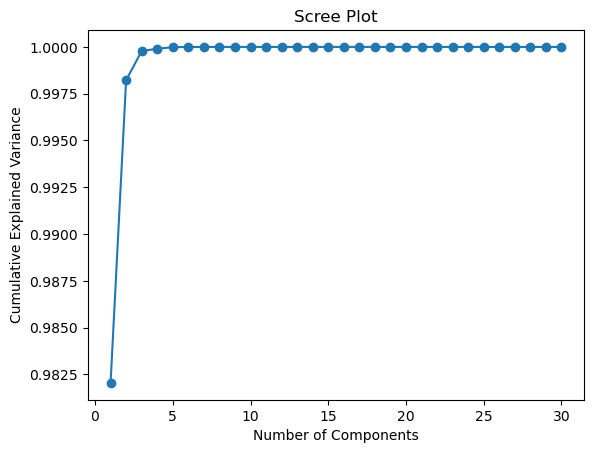

Accuracy (Original): 0.9590643274853801
Accuracy (PCA 95%): 0.9532163742690059


In [2]:
'''
Question 8 : PCA + KNN with Variance Analysis and Visualization Task:
          1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
          2. Apply PCA and plot the scree plot (explained variance ratio).
          3. Retain 95% variance and transform the dataset.
          4. Train KNN on the original data and PCA-transformed data, then compare accuracy.
          5. Visualize the first two principal components using a scatter plot (color by class).
Answer:
'''

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

pca = PCA().fit(X)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

pca_95 = PCA(0.95)
X_pca = pca_95.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
acc_orig = knn.score(X_test, y_test)

knn.fit(X_train_pca, y_train)
acc_pca = knn.score(X_test_pca, y_test)

print("Accuracy (Original):", acc_orig)
print("Accuracy (PCA 95%):", acc_pca)

Euclidean MSE: 3103.699882259301
Manhattan MSE: 3675.2741541435325


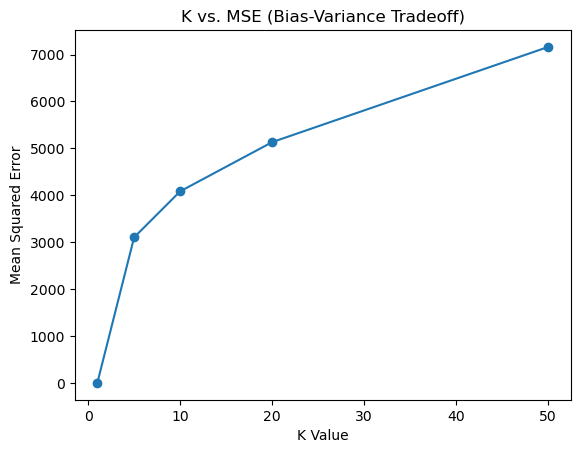

In [3]:
'''
Question 9:KNN Regressor with Distance Metrics and K-Value Analysis Task:
        1. Generate a synthetic regression dataset
           (sklearn.datasets.make_regression(n_samples=500, n_features=10)).
        2. Train a KNN regressor with:
          a. Euclidean distance (K=5)
          b. Manhattan distance (K=5)
          c. Compare Mean Squared Error (MSE) for both.
        3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.
Answer:

'''

from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

for metric in ['euclidean', 'manhattan']:
    model = KNeighborsRegressor(n_neighbors=5, metric=metric)
    model.fit(X, y)
    y_pred = model.predict(X)
    print(f"{metric.capitalize()} MSE:", mean_squared_error(y, y_pred))

mse_scores = []
for k in [1, 5, 10, 20, 50]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X, y)
    y_pred = model.predict(X)
    mse_scores.append(mean_squared_error(y, y_pred))

plt.plot([1, 5, 10, 20, 50], mse_scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')
plt.title('K vs. MSE (Bias-Variance Tradeoff)')
plt.show()

In [4]:
'''
Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data
       Task:
          1. Load the Pima Indians Diabetes dataset (contains missing values).
          2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
          3. Train KNN using:
             a. Brute-force method
             b. KD-Tree
             c. Ball Tree
          4. Compare their training time and accuracy.
          5. Plot the decision boundary for the best-performing method (use 2 most important features).
Answer:
'''

import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

data = pd.read_csv("diabetes.csv")
X = data.drop('Outcome', axis=1)
y = data['Outcome']

imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

for algo in ['brute', 'kd_tree', 'ball_tree']:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start = time.time()
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    duration = time.time() - start
    print(f"{algo} - Accuracy: {accuracy_score(y_test, preds):.3f}, Time: {duration:.4f}s")

brute - Accuracy: 0.688, Time: 0.0874s
kd_tree - Accuracy: 0.688, Time: 0.0230s
ball_tree - Accuracy: 0.688, Time: 0.0312s
